### Setting up the Frameworks

In [1]:
!pip install --upgrade keras
!pip install --upgrade tensorflow

import keras
print('Keras version:',keras.__version__)

from keras import backend as K

  Using cached https://files.pythonhosted.org/packages/5e/10/aa32dad071ce52b5502266b5c659451cfd6ffcbf14e6c8c4f16c0ff5aaab/Keras-2.2.4-py2.py3-none-any.whl
  Found existing installation: Keras 2.2.2
    Uninstalling Keras-2.2.2:
      Successfully uninstalled Keras-2.2.2
    100% |████████████████████████████████| 92.5MB 508kB/s eta 0:00:01    24% |████████                        | 23.1MB 5.7MB/s eta 0:00:13    26% |████████▎                       | 24.1MB 25.4MB/s eta 0:00:03    40% |█████████████                   | 37.7MB 17.3MB/s eta 0:00:04    48% |███████████████▍                | 44.5MB 10.2MB/s eta 0:00:05��█████▌           | 59.3MB 16.9MB/s eta 0:00:02��         | 64.8MB 33.3MB/s eta 0:00:01    83% |██████████████████████████▊     | 77.2MB 25.8MB/s eta 0:00:01��█████████████████████████▍   | 82.2MB 37.0MB/s eta 0:00:01
  Using cached https://files.pythonhosted.org/packages/bb/48/13f49fc3fa0fdf916aa1419013bb8f2ad09674c275b4046d5ee669a46873/tensorflow_estimator-1.13.0-py2.py3-non

Using TensorFlow backend.


Keras version: 2.2.4


### Preparing the Data

In [2]:
from keras.preprocessing.image import ImageDataGenerator

data_folder = 'resized_images'
img_size = (128,128)
batch_size = 18

print("Getting Data...")
datagen = ImageDataGenerator(rescale=1./255, # normalize pixel values,
                             validation_split=0.30) # hold back 30% of the images for validation

print("Preparing training dataset...")
train_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training') # set as training data

print("Preparing validation dataset...")
validation_generator = datagen.flow_from_directory(
    data_folder,
    target_size=img_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation') # set as validation data

classes = sorted(train_generator.class_indices.keys())
print("class names: ", classes)

Getting Data...
Preparing training dataset...
Found 168 images belonging to 3 classes.
Preparing validation dataset...
Found 72 images belonging to 3 classes.
class names:  ['automobile', 'plane', 'train']


### Defining the CNN
Now we're ready to train our model. This involves defining the layers for our CNN, and compiling them for multi-class classification.

In [5]:
# Define a CNN classifier network
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization
from keras.layers import Activation, Dropout, Flatten, Dense
from keras import optimizers

# Define the model as a sequence of layers
model = Sequential()

# The input layer accepts an image and applies a convolution that uses 24 3x3 filters and a rectified linear unit activation function
model.add(Conv2D(24, (3, 3), input_shape=train_generator.image_shape))
model.add(Activation("relu"))

# Next we'll add a max pooling layer with a 2x2 patch
model.add(MaxPooling2D(pool_size=(2,2)))

# Now we just add more layers
model.add(Conv2D(24, (3, 3)))
model.add(Activation("relu"))

model.add(Conv2D(48, (3, 3)))
model.add(Activation("relu"))

model.add(Conv2D(96, (3, 3)))
model.add(Activation("relu"))
model.add(MaxPooling2D(pool_size=(2, 2)))

# Now we'll flatten the feature maps and generate an output layer with a predicted probability for each class
model.add(Flatten())
model.add(Dense(train_generator.num_classes))
model.add(Activation("softmax"))

# With the layers defined, we can now compile the model for categorical (multi-class) classification
opt = optimizers.Adam(lr=0.001)
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

print(model.summary())

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_5 (Conv2D)            (None, 126, 126, 24)      672       
_________________________________________________________________
activation_6 (Activation)    (None, 126, 126, 24)      0         
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 63, 63, 24)        0         
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 61, 61, 24)        5208      
_________________________________________________________________
activation_7 (Activation)    (None, 61, 61, 24)        0         
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 59, 59, 48)        10416     
_________________________________________________________________
activation_8 (Activation)    (None, 59, 59, 48)        0         
__________

### Training the Model


In [6]:
num_epochs = 15
history = model.fit_generator(
    train_generator,
    steps_per_epoch = train_generator.samples // batch_size,
    validation_data = validation_generator, 
    validation_steps = validation_generator.samples // batch_size,
    epochs = num_epochs)

Epoch 1/15
9/9 [==============================] - 15s 2s/step - loss: 1.2051 - acc: 0.3907 - val_loss: 1.0653 - val_acc: 0.3194
Epoch 2/15
9/9 [==============================] - 12s 1s/step - loss: 0.9535 - acc: 0.5560 - val_loss: 0.8232 - val_acc: 0.6111
Epoch 3/15
9/9 [==============================] - 11s 1s/step - loss: 0.6794 - acc: 0.6964 - val_loss: 0.6411 - val_acc: 0.7222
Epoch 4/15
9/9 [==============================] - 10s 1s/step - loss: 0.4879 - acc: 0.8271 - val_loss: 0.8556 - val_acc: 0.7361
Epoch 5/15
9/9 [==============================] - 10s 1s/step - loss: 0.4062 - acc: 0.8707 - val_loss: 0.4842 - val_acc: 0.8194
Epoch 6/15
9/9 [==============================] - 10s 1s/step - loss: 0.3538 - acc: 0.8484 - val_loss: 1.0533 - val_acc: 0.6250
Epoch 7/15
9/9 [==============================] - 10s 1s/step - loss: 0.6692 - acc: 0.7338 - val_loss: 0.5317 - val_acc: 0.8889
Epoch 8/15
9/9 [==============================] - 10s 1s/step - loss: 0.3178 - acc: 0.9004 - val_loss: 0

### View the Loss History

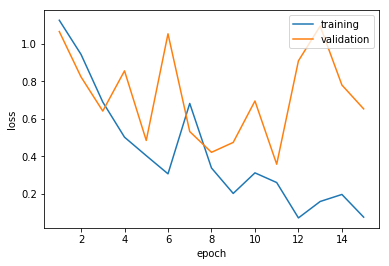

In [7]:
%matplotlib inline
from matplotlib import pyplot as plt

epoch_nums = range(1,num_epochs+1)
training_loss = history.history["loss"]
validation_loss = history.history["val_loss"]
plt.plot(epoch_nums, training_loss)
plt.plot(epoch_nums, validation_loss)
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['training', 'validation'], loc='upper right')
plt.show()

Generating predictions from validation data...


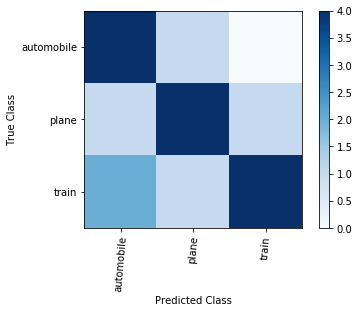

In [8]:
#Keras doesn't have a built-in confusion matrix metric, so we'll use SciKit-Learn
import numpy as np
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
%matplotlib inline

print("Generating predictions from validation data...")
# Get the image and label arrays for the first batch of validation data
x_test = validation_generator[0][0]
y_test = validation_generator[0][1]

# Use the moedl to predict the class
class_probabilities = model.predict(x_test)

# The model returns a probability value for each class
# The one with the highest probability is the predicted class
predictions = np.argmax(class_probabilities, axis=1)

# The actual labels are hot encoded (e.g. [0 1 0], so get the one with the value 1
true_labels = np.argmax(y_test, axis=1)

# Plot the confusion matrix
cm = confusion_matrix(true_labels, predictions)
plt.imshow(cm, interpolation="nearest", cmap=plt.cm.Blues)
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=85)
plt.yticks(tick_marks, classes)
plt.xlabel("Predicted Class")
plt.ylabel("True Class")
plt.show()

### Use the Model with New Data
Now that we've trained and evaluated our model, we can use it to predict classes for new images.

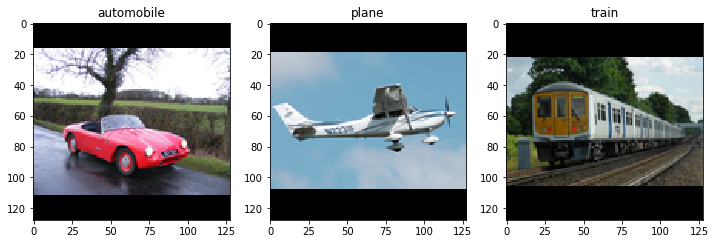

In [9]:
# Helper function to make image square
def reshape_image(img, size): 
    from PIL import Image, ImageOps 
    
    # Convert RGBA images to RGB
    if np.array(img).shape[2] == 4:
        img = img.convert('RGB')
        
    # resize the image
    img.thumbnail(size, Image.ANTIALIAS)
    newimg = Image.new("RGB", size, (0, 0, 0))
    newimg.paste(img, (int((size[0] - img.size[0]) / 2), int((size[1] - img.size[1]) / 2)))
  
    # return the resized image
    return np.array(newimg)

# Function to predict the class of an image
def predict_image(classifier, image_array):
    import numpy as np
    
    imgfeatures = image_array.astype('float32')
    imgfeatures /= 255
    
    # These are the classes our model can predict
    classnames = ['automobile', 'plane', 'train']
    
    # Predict the class of each input image
    predictions = classifier.predict(imgfeatures)
    
    predicted_classes = []
    for prediction in predictions:
        class_idx = np.argmax(prediction)
        predicted_classes.append(classnames[int(class_idx)])
    return predicted_classes

# Predict class for new data
from PIL import Image
import requests
from io import BytesIO
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np
%matplotlib inline

image_urls = []
image_urls.append('https://upload.wikimedia.org/wikipedia/commons/thumb/d/d9/1962_Fairthorpe_Electron_Minor_British_Sports_Car.jpg/1200px-1962_Fairthorpe_Electron_Minor_British_Sports_Car.jpg')
image_urls.append('https://upload.wikimedia.org/wikipedia/commons/9/9e/Cessna182t_skylane_n2231f_cotswoldairshow_2010_arp.jpg')
image_urls.append('https://upload.wikimedia.org/wikipedia/commons/thumb/f/fc/319373_and_319_number_438_to_Sevenoaks_2E45_by_Train_Photos.jpg/1200px-319373_and_319_number_438_to_Sevenoaks_2E45_by_Train_Photos.jpg')
size = (128,128)

img_array = []

for url_idx in range(len(image_urls)):
    # Get the image
    response = requests.get(image_urls[url_idx])
    img = Image.open(BytesIO(response.content))
    img = reshape_image(img, size)
    img_array.append(img)
    
    
predicted_classes = predict_image(model, np.array(img_array))

fig = plt.figure(figsize=(12, 8))
idx = 0
for predicted_class in predicted_classes:
    a=fig.add_subplot(1,len(image_urls),idx+1)
    img = img_array[idx]
    imgplot = plt.imshow(img)
    a.set_title(predicted_class)
    idx += 1
